In [16]:
import helper
import paths
import processing
import algorithms
import librosa
import librosa.core as lc
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sc
from scipy.io.wavfile import write, read
import scipy
from scipy.signal import firwin, freqz, lfilter, welch 

In [ ]:
adj_gain  = 2

########################################  pre-adapted-filter-coeefs###################################
win_frame = 12
fs, signal = read( paths.DATA_PATH / ( 'pyrmTst2micWn3'+ paths.AUDIO_FORMAT))
print(signal.shape)
signal_0 = np.asfortranarray(signal[:,0])/np.iinfo(np.int16).max
signal_1 = np.asfortranarray(signal[:,1])/np.iinfo(np.int16).max
helper.plot_signals(signal_0, signal_1, 'delayed noise plus utterfance 2 mic signal', 'signal_0', 'signal_1')
Zxx_0, Zxx_1, n_freqs, n_frames, hop_length = helper.dual_stft(signal_0, signal_1, window_size = 2048, hop_percentage = 50)
epsilon, h = algorithms.stft_fast_rls_def_coefs(Zxx_0, Zxx_1, d = win_frame, filter_length=3, f_factor = 0.993,delta = 0.1)
epsilon_time = lc.istft(epsilon, hop_length=hop_length)*adj_gain
helper.plot_signals(epsilon_time,signal_0, 'before and after filter', 'after','before')
plt.show()

Progress: [#-------------------] 7.5%
Frame 42/562


In [ ]:
def my_fft(data, fs = 10000.0, figNo = None, cc = 'black', ll = None):
    w = np.fft.fft(data)
    freqs = np.fft.fftfreq(len(w))*fs
    if len(w) % 2:
        ff = freqs[0: int(len(w)/2) - 1]
        ww = w[0: int(len(w)/2) - 1]
    else:
        ff = freqs[0: int((len(w) - 1)/2)]
        ww = w[0: int((len(w) - 1)/2)]
    if figNo:
        plt.figure(figNo)
        plt.plot(ff, 20*np.log10(abs(ww)), color=cc, label=ll )
        ax = plt.gca()
        ax.set_xlabel("Normalized frequency")
        ax.set_ylabel("magnitude")
    return ff, ww
my_fft(epsilon_time, figNo = 100, cc = 'black')
my_fft(signal_0, figNo = 100, cc = 'red')

In [ ]:
fs, signal = read( paths.DATA_PATH / ( 'pyrmTst2micWn2'+ paths.AUDIO_FORMAT))
signal_0 = np.asfortranarray(signal[:,0])/np.iinfo(np.int16).max
signal_1 = np.asfortranarray(signal[:,1])/np.iinfo(np.int16).max
helper.plot_signals(signal_0, signal_1, 'delayed noise plus utterfance 2 mic signal', 'signal_0', 'signal_1')
Zxx_0, Zxx_1, n_freqs, n_frames, hop_length = helper.dual_stft(signal_0, signal_1, window_size = 2048, hop_percentage = 50)
epsilon = algorithms.stft_fast_rls_ld_coefs(Zxx_0, Zxx_1, d = win_frame, filter_length=3, h=h)
epsilon_time = lc.istft(epsilon, hop_length=hop_length)*adj_gain
helper.plot_signals(epsilon_time,signal_0, 'before and after filter', 'after','before')

plt.show()
write(paths.DATA_PATH / ('1' + paths.AUDIO_FORMAT), fs, epsilon_time)

#################################

In [ ]:
def my_fft(data, fs = 10000.0, figNo = None, cc = 'black', ll = None):
    w = np.fft.fft(data)
    freqs = np.fft.fftfreq(len(w))*fs
    if len(w) % 2:
        ff = freqs[0: int(len(w)/2) - 1]
        ww = w[0: int(len(w)/2) - 1]
    else:
        ff = freqs[0: int((len(w) - 1)/2)]
        ww = w[0: int((len(w) - 1)/2)]
    if figNo:
        plt.figure(figNo)
        plt.plot(ff, 20*np.log10(abs(ww)), color=cc, label=ll )
        ax = plt.gca()
        ax.set_xlabel("Normalized frequency")
        ax.set_ylabel("magnitude")
    return ff, ww
my_fft(epsilon_time, figNo = 100, cc = 'black')
my_fft(signal_0, figNo = 100, cc = 'red')

Progress: [####################] 100.0%


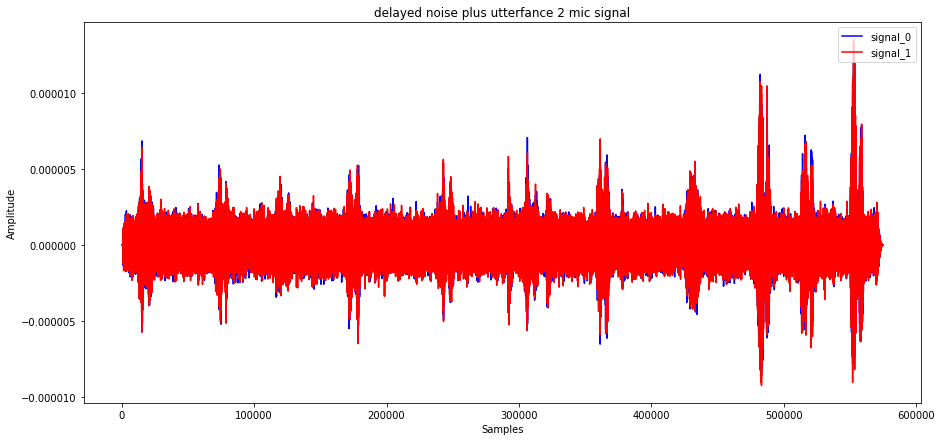

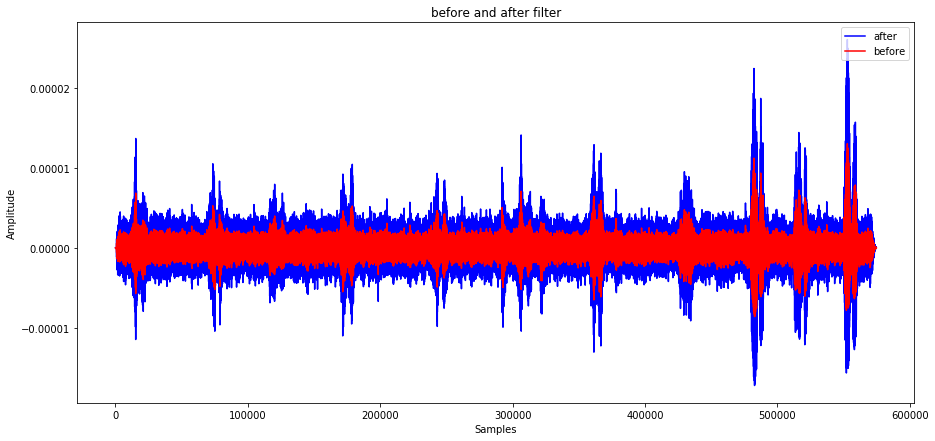

In [13]:
fs, signal = read( paths.DATA_PATH / ( 'pyrmTst2micWn1'+ paths.AUDIO_FORMAT))
signal_0 = np.asfortranarray(signal[:,0])/np.iinfo(np.int16).max
signal_1 = np.asfortranarray(signal[:,1])/np.iinfo(np.int16).max
helper.plot_signals(signal_0, signal_1, 'delayed noise plus utterfance 2 mic signal', 'signal_0', 'signal_1')
Zxx_0, Zxx_1, n_freqs, n_frames, hop_length = helper.dual_stft(signal_0, signal_1, window_size = 2048, hop_percentage = 50)
epsilon = algorithms.stft_fast_rls_ld_coefs(Zxx_0, Zxx_1, d = win_frame, filter_length=3, h=h)
epsilon_time = lc.istft(epsilon, hop_length=hop_length)*adj_gain
helper.plot_signals(epsilon_time,signal_0, 'before and after filter', 'after','before')

plt.show()
write(paths.DATA_PATH / ('out_cafe_nreverb_mic2' + paths.AUDIO_FORMAT), fs, epsilon_time)

#################################

(array([0.00000000e+00, 1.73979610e-02, 3.47959219e-02, ...,
        4.99993041e+03, 4.99994781e+03, 4.99996520e+03]),
 array([-1.40012200e-02-4.20128342e-19j, -5.77225408e-03-3.79931567e-03j,
        -2.42093635e-03-6.01633309e-03j, ...,
        -2.96718423e-05+7.53011428e-05j, -3.15609255e-05+3.98993937e-05j,
         1.58448492e-05+9.56659028e-05j]))

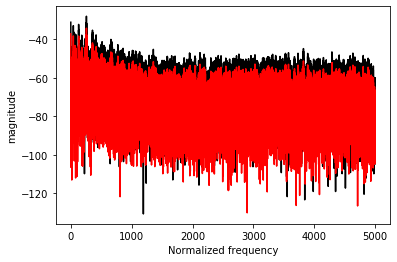

In [14]:
def my_fft(data, fs = 10000.0, figNo = None, cc = 'black', ll = None):
    w = np.fft.fft(data)
    freqs = np.fft.fftfreq(len(w))*fs
    if len(w) % 2:
        ff = freqs[0: int(len(w)/2) - 1]
        ww = w[0: int(len(w)/2) - 1]
    else:
        ff = freqs[0: int((len(w) - 1)/2)]
        ww = w[0: int((len(w) - 1)/2)]
    if figNo:
        plt.figure(figNo)
        plt.plot(ff, 20*np.log10(abs(ww)), color=cc, label=ll )
        ax = plt.gca()
        ax.set_xlabel("Normalized frequency")
        ax.set_ylabel("magnitude")
    return ff, ww
my_fft(epsilon_time, figNo = 100, cc = 'black')
my_fft(signal_0, figNo = 100, cc = 'red')